<h1><center> Uvod u neuronske mreže </center></h1>

Cilj notebooka je razviti osnovnu intuiciju iza neuronskih mreža te samostalno implementirati neuronsku mrežu. Cijeli notebook napisan je uz pomoć knjige "M. Nielsen - Neural Networks and Deep Learning".

Sadržaj notebooka:

1. [Uvod u neuronske mreže](#intro)  - Kratki pregled što su neuronske mreže i kako rade. <br>
    1.1 [Motivacija](#motiv) <br>
    1.2 [Perceptron](#perc) <br>
    1.3 [Neuroni](#neuron) <br>
    1.4 [Neuronske mreže](#nn) <br>
2. [Backpropagation](#backprop)     - Algoritam iza učenja neuronskih mreža. <br>
    2.1 [Gradijentni spust](#graddesc) <br>
    2.2 [Backpropagation](#backpropagation) <br>
3. [Implementacija neuronske mreže](#implementation) - Implementacija neuronske mreže za sigmoid aktivacijsku funkciju.
4. [Zaključak](#conclusion)          - Završna riječ o neuronskim mrežama. <br>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

from IPython.display import Image
from sklearn.model_selection import train_test_split

### Uvod u neuronske mreže <a name="intro"></a>


#### Motivacija <a name="motiv"></a>

<p>U konvencionalnom pristupu programiranju, ljudi su "govorili" računalu što da radi tako što su razbijali velike probleme na mnogo manjih precizno definiranih problema koje je računalo moglo lako izvršavati.</p>
<p>Neuronske mreže zauzimaju potpuno suprotni pristup načinu na koji smo dosada programirali. U neuronskim mrežama mi ne kažemo računalu kako da riješi naš problem. Umjesto toga, neuronske mreže uče promatrajući velike količine podataka, samostalno smišljajući rješenje predstavljenog problema.</p>

<p> Kako bi dobili predodžbu koliko su neuronske mreže inovativne zamislimo problem prepoznavanja znamenki. Prepoznavanje znamenki ne bi trebalo biti lagan problem, ali mi ljudi smo izuzetno dobri u tome i često ne cijenimo koliko teške probleme naš mozak rješava na dnevnoj bazi. </p>

<p> Tek nakon što pokušamo napisati program koji prepoznaje znamenke, postanemo svjesni problema - ono što nam se dosada činilo izuzetno laganim, odjednom postaje jako težak problem. Jednostavna intuicija iza toga kako prepoznajemo znamenke poput "6 se sastoji od kružića i ravne crte iz donjeg lijevod u gornji desni kut" je ne baš jednostavna za izraziti algoritamski. Čak i ako pokušamo jasno definirati pravila, izgubiti ćemo se u moru specijalnih slučajeva. </p>

<p> Neuronske mreže zauzimaju potpuno drukčiji pristup. Ideja je da uzmemo veliku količinu napisanih znamenki i razvijemo sistem koji će učiti iz tih znamenki, odnosno sistem koji će sam definirati pravila kako raspoznati koja je koja znamenka. </p>

#### Perceptron - prethodnik neurona <a name="perc"></a>

<p>Da bi razumjeli što je neuronska mreža, prvo moramo razumjeti što je neuron. </p>

<p>Prije nego što naučimo što je neuron, promotriti ćemo model <em>perceptrona</em>. Perceptron prima nekoliko vrijednosti $x_1$, $x_2$,..., $x_n$, $x_i \in \{0,1\}$ i daje rezultat $y \in \{0,1\}$ tako što svakom ulaznom podatku $x_i$ daje "važnost" $\omega_i$. Tu "važnost" $\omega_i$ zvati ćemo težina. Rezultat, 0 ili 1, koji perceptron daje ovisi isključivo o tome je li $\sum \omega_i \cdot x_i$ veća ili manja od nekog praga. </p>

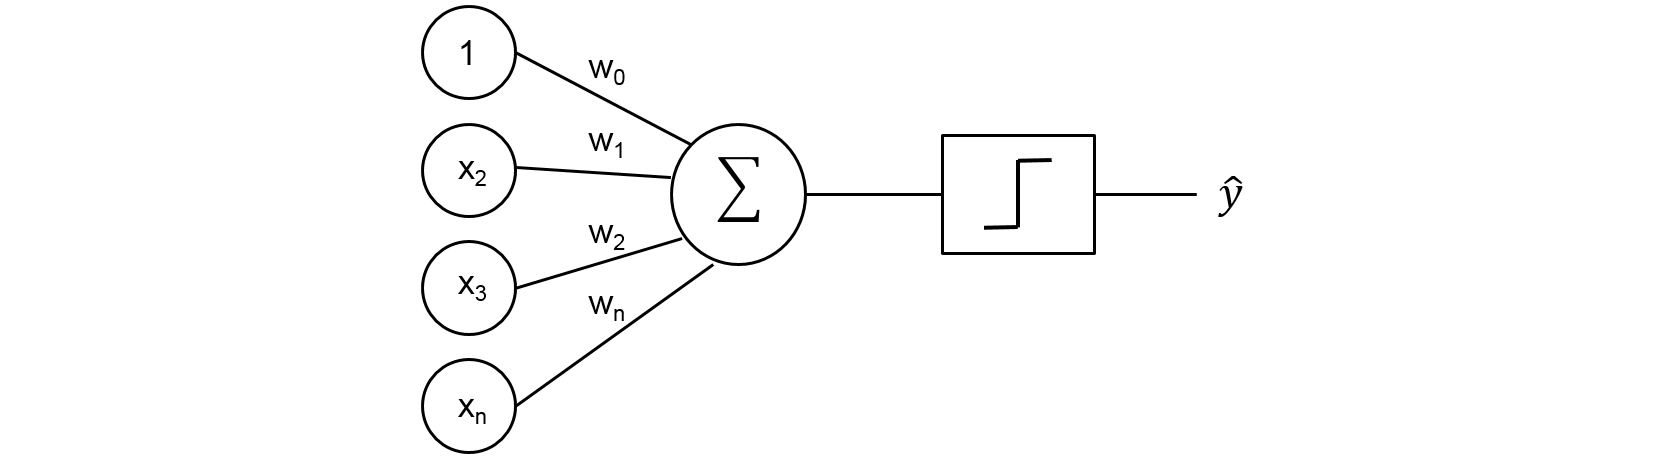

Primjer perceptrona.


In [2]:
try:
    display(Image(filename = "images/perceptron.png"))
except:
    display(Image(url = "https://jtsulliv.github.io/images/perceptron/perceptron_2.png"))
    
print("Primjer perceptrona.")

<p>Ako zapišemo $x_i$ i $\omega_i$ kao vektore $x$ i $\omega$, te uvedemo bias $b=-$prag dobijemo sljedeći rezultat. </p>

$$
\text{perceptron(x)} = \left\{
    \begin{array} \\
        0, & \ \omega \cdot x + b\leq 0 \\
        1, & \ \omega \cdot x + b > 0 \\
    \end{array}
\right.
$$

<p> Stoga perceptron možemo promatrati kao model koji daje težinu nekim tvrdnjama i iz njih donosi zaključak. </p>

Ono što u konačnici želimo postići je međusobno povezati perceptrone te ih promjenom težina i biasa naučiti da donose kompleksnije zaključke. Kako bi postigli učenje moramo malom promjenom na težini ili biasu dobiti i malu promjenu na izlazu mreže perceptrona. Međutim, problem kod perceptrona je što mala promjena na težinama i biasu može uzrokovati potpunu promjenu na izlazu. 

Zašto je to problem? Pretpostavimo da naša mreža dobro klasificira većinu brojeva, ali klasificira sliku broja kao 1 umjesto 7. Ako bi se malom promjenom na težinama dobivala mala promjena na izlazu, onda bi polako mogli natjerati naš program da klasificira tu sliku kao 7, minimalno utječući na to kako mreža reagira na ostale slike. Međutim ako je mreža napravljena od perceptrona, mala promjena koja će natjerati sliku da pokazuje na 7 usput će možda promijeniti i druge slike na potpuno nepredvidiv način.

#### Neuroni - osnovne građevne jedinice <a name="neuron"></a>

<p>U modelu perceptrona smo naišli na problem diskretnog izlaza, odnosno perceptron kao izlaz vraća 0 ili 1. Kako bi rješili taj problem uvodimo aktivacijske funkcije i tako nastaju neuroni kakvi se i danas koriste. </p>

<p> Koja je svrha aktivacijske funkcije? Recimo da želimo postići da umjesto da naš neuron vraća samo 0 ili 1, on ima mogućnost vratiti i sve vrijednosti između. Time smo postigli da mala promjena u nekoj od težina ne uzrokuje veliki flip sa 0 na 1 ili obratno. Kako bi dobili takav model neurona primjenjujemo aktivacijsku funkciju na njegov izlaz. </p>

<p> Najčešće korištene aktivacijske funkcije su: </p>

\begin{align}
    f(x) &= \frac{1}{1 + e^{-x}}, && \text{sigmoid funkcija} \\ \\
    f(x) &= tanh(x),   && \text{tangens hiperbolni} \\ \\
    f(x) &= max(0, x), && \text{ReLu funkcija}
\end{align}

<br>

In [3]:
# Step funkcija koja se koristi u modelu perceptrona
def step(x):
    return np.heaviside(x, 1)

# Jednadžbe aktivacijskih funkcija koje se koriste u modelu neurona
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def tanh(x):
    return np.tanh(x)

def ReLu(x):
    return np.maximum(0, x)

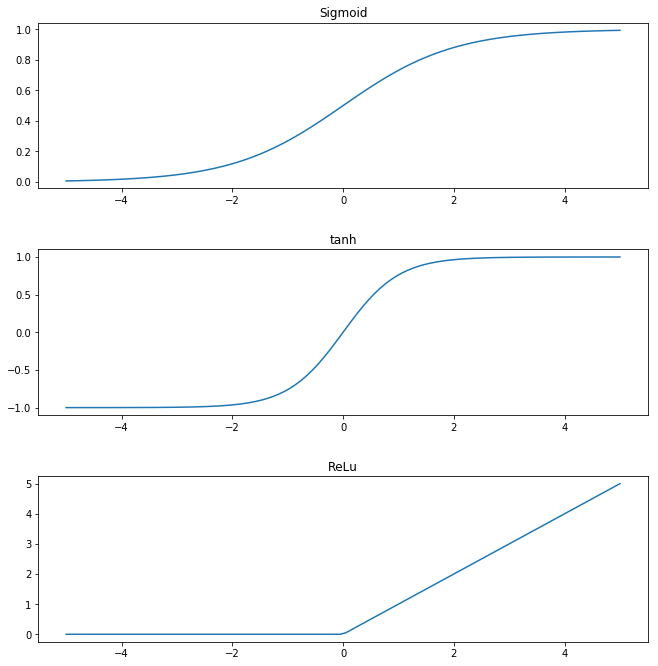

In [4]:
# Grafovi aktivacijskih funkcija
x = np.linspace(-5, 5, num = 100)

fig1, ax1 = plt.subplots(3, 1, figsize=(10, 10))
fig1.tight_layout(pad = 4.0)
ax1[0].plot(x, sigmoid(x))
ax1[0].set_title('Sigmoid')

ax1[1].plot(x, tanh(x))
ax1[1].set_title('tanh')

ax1[2].plot(x, ReLu(x))
ax1[2].set_title('ReLu')

plt.show()

<p> 
Uzmimo kao primjer sigmoid aktivacijsku funkciju i usporadimo je sa dosadašnjom step funkcijom primjenjenom na perceptronu:
</p>

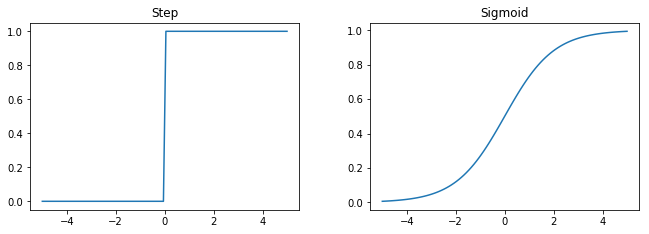

In [5]:
# Usporedba grafa sigmoid i step funkcija
x = np.linspace(-5, 5, num = 100)

fig2, ax2 = plt.subplots(1, 2, figsize=(10, 4))
fig2.tight_layout(pad = 4.0)

ax2[0].plot(x, step(x))
ax2[0].set_title('Step')

ax2[1].plot(x, sigmoid(x))
ax2[1].set_title('Sigmoid')

plt.show()

<p> Slično kao i perceptron, <em>sigmoid neuron</em> kao ulazne vrijednosti prima $x_1$, ..., $x_n$. Također, isto kao perceptron, neuron se sastoji od težina $\omega_i$ i biasa $b$. Međutim, izlaz neurona nije 0 ili 1, već prima vrima vrijednosti $\sigma(\omega \cdot x + b)$, gdje je $\sigma$ sigmoid funkcija. </p> 

$$ \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + \text{exp}\big({-\sum{\omega_i \cdot x_i} - b}\big)}$$

<p>
Prvo primjetimo sličnost između step i sigmoid funkcije. Neka je $z = \omega \cdot x + b$. Ako je $z$ velik pozitivan broj, tada je $e^{-z} \approx 0$ odnosno $\sigma(z) \approx 1$, baš kao što bi očekivali da će biti za perceptron. Ako je $z$ velik negativan broj, tada $e^{-z} \to \infty$ odnosno $\sigma(z) \approx 0$, baš kao što bi očekivali da će biti za perceptron. Jedino kada $z$ poprima vrijednosti između očekujemo drukčije ponašanje.
</p>

<p>
Promatrajući sliku možemo zaključiti da je sigmoid zapravo samo izglađena step funkcija. Glatkoća sigmoid funkcije je od ključne važnosti. Diferencijalnim računom dolazimo do sljedećeg rezultata:
    $$ \Delta \text{izlaz} \approx \sum_i \frac{\partial \text{izlaz}}{\partial \omega_i}\Delta \omega_i + \frac{\partial \text{izlaz}}{\partial b} \Delta b $$
<br> Gornja jednadžba kaže da je $\Delta \text{izlaz}$ linearna funkcija u ovisnosti o $\Delta \omega_i$ i $\Delta b$. Svojstvo linearnosti garantira nam da ćemo malim promjenama na težinama i biasu postići male promjene i na izlazu, što je upravo ono što smo željeli postići.
</p>

<p>
Primjetimo da je od ključne važnosti sigmoid funkcije njena glatkoća, a ne oblik. To nas motivira na rad i sa drugim aktivacijskim funkcijama, a glavna promjena koja nastaje zamjenom aktivacijske funkcije je promjena parcijalne derivacije. Često ćemo tražiti aktivacijske funkcije (poput sigmoid funkcije) čije parcijalne derivacije imaju lijepa svojstva, odnosno pojednostavljuju račun. 
</p>

#### Neuronske mreže <a name="nn"></a>

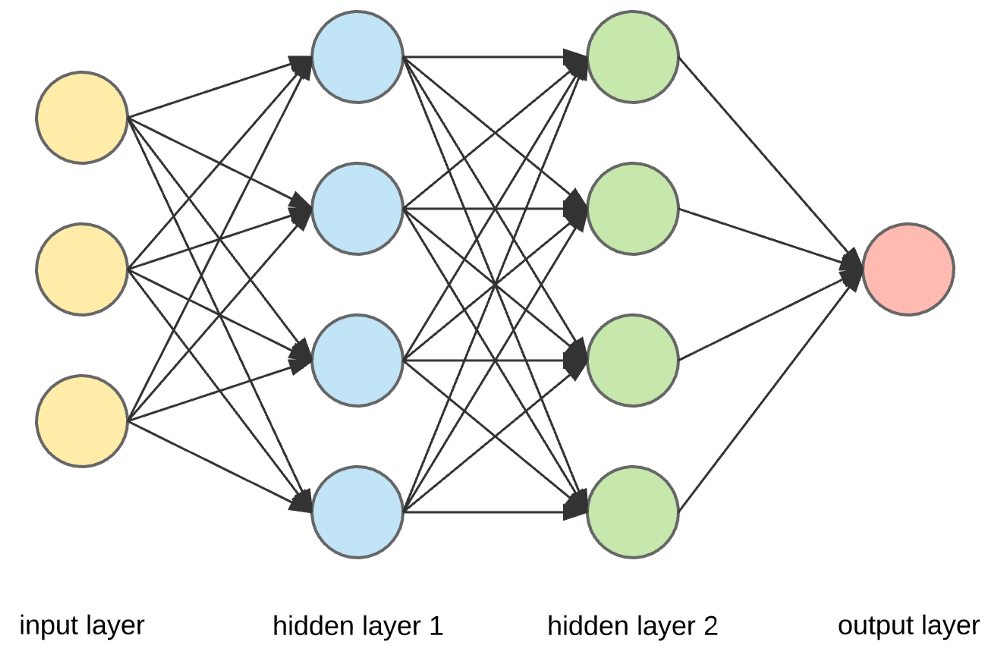

Primjer neuronske mreže.


In [6]:
try:
    display(Image(filename = "images/neuralnetwork.png"))
except:
    display(Image(url = "https://miro.medium.com/max/1318/1*3fA77_mLNiJTSgZFhYnU0Q.png"))
    
print("Primjer neuronske mreže.")

<p>
Promotrimo gornji primjer neuronske mreže. Takav model neuronske mreže je ujedno i najjednostavniji model - unaprijedna neuronska mreža. U unaprijednoj neuronskoj mreži podaci se kreću u jednom smjeru, unaprijed - od ulaza, preko skrivenih slojeva, do izlaza. Neuroni su povezani u slojeve, a svaki sloj ima određen broj neurona koji je vidljivo odvojen od ostalih slojeva. Svaka neuronska mreža sastoji se od jednog ulaznog sloja (input layer), jednog izlaznog sloja (output layer) te jednog ili više skrivenih slojeva koji služe za obradu. Neuroni jednog sloja su pospojeni sa svim neuronima idućeg sloja preko poveznica (težina).
</p>

<p>
Gornji primjer sastoji se od ulaznog sloja sa tri neurona, dva skrivena sloja sa po četiri neurona te izlaznog sloja sa jednim neuronom.
</p>


<p>Dizajniranje ulaznog i izlaznog sloja neuronske mreže je uglavnom vrlo intuitivno. Vratimo se na primjer prepoznavanja znamenki. Tada ćemo kao ulazni sloj imati neurona koliko je piksela na slici, gdje svaki neuron prima jedan piksel slike. Izlazni sloj sastojat će se od 10 neurona, koliko je i brojeva koje trebamo klasificirati. Ako prvi neuron izlaznog sloja ima vrijednost približno 1, zaključit ćemo da se radi o 0. Ako drugi neuron ima vrijednost približno 1, zaključit ćemo da se radi o 1. Dizajniranje skrivenih slojeva je malo zeznutije i uglavnom se oslanjamo na eksperimentiranje. </p> 

<p>
Da zaključimo, klasificirati ćemo broj prema tome koji od 10 neurona u izlaznom sloju poprima najveću vrijednost ako mu je kao ulaz dana slika (pikseli slike). </p>

### Backpropagation <a name="backprop"></a>

#### Gradijentni spust <a name="graddesc"></a>

<p>Sada kada znamo kako dizajnirati neuronsku mrežu, pitanje je kako je istrenirati. </p>

<p> Neka $x$ označava ulazni podatak neuronske mreže koju planiramo trenirati, a $y$ označava željeni izlaz mreže (npr ako $x$ predstavlja broj 2, $y = y(x) = (0,0,1,0,0,0,0,0,0,0))$. Ono što želimo postići je algoritam koji pronalazi težine i bias tako da izlaz naše neuronske mreže aproksimira $y(x)$, iz čega zaključujemo da su neuronske mreže zapravo <b>aproksimacije funkcija</b>. Kako bi uspjeli kvantificirati koliko dobro neuronska mreža odrađuje dani zadatak, potrebna nam je funkcija pogreške (cost function). Kao dobar primjer cost funkcije dajemo MSE (Mean squared error funkciju). <br> <br>
    $$ C(\omega, b) = \frac{1}{2n} \sum_x \left\lVert y(x) - a(x) \right\rVert $$
    
gdje a(x) predstavlja izlaz neuronske mreže. Izlaz funkcije C naravno ovisi o $\omega$ i $b$, ali zbog ljepote zapisa ta povezanost nije eksplicitno zapisana. Primjetimo da $C(\omega, b)$ nenegativna funkcija koja poprima jako male vrijednosti točno onda kada $a(x)$ dobro aproksimira $y(x)$ za sve ulazne vrijednosti $x$. Suprotno tomu, što je $C(\omega, b)$ veći, to funkcija lošije aproksimira date vrijednosti. Iz ovoga zaključujemo da je cilj našeg algoritma minimizirati funkciju $C(\omega, b)$. Taj posao prepuštamo gradijentnom spustu. </p>

<p> Pri uvođenju MSE funkcije pogreške, prirodno se nameće pitanje zašto je to potrebno. Čemu uvod neke nove mjere kad je ono što nas zapravo zanima broj točno klasificiranih znamenki. Zašto ne pokušati maksimizirati broj točno klasificiranih direktno? Zašto uvesti neku drugu mjeru koju minimiziramo? Problem kod broja točno klasificiranih znamenki je taj što funkcija nije glatka, odnosno malim promjenama u težinama i biasu nećemo postići nikakve promjene u broju točnih znamenki, pa nećemo moći zaključiti je li promjena koju smo napravili dobra. Stoga se prvo fokusiramo na minimiziranje funkcije pogreške, a tek onda mjerimo preciznost klasifikacije. </p>

<p> Da bi razumjeli kako minimizirati funkciju, odnosno kako sami gradijentni spust radi zamislimo funkciju $C$ kao funkciju u ovisnosti o dvije varijable, $x$ i $y$, te neka vrijedi: </p>

$$ C(x, y) = x^2 + y^2 $$

In [7]:
# Primjer funkcije pogreške
def cost(x, y):
    """ cost(x, y) = x^2 + y^2 """
    return (np.add(np.square(x), np.square(y)))

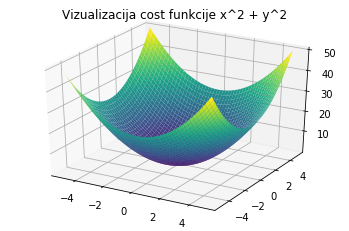

In [8]:
# Graf funkcije pogreške
ax3 = plt.axes(projection='3d')

x = np.linspace(-5, 5, num = 50)
y = np.linspace(-5, 5, num = 50)
xx, yy = np.meshgrid(x, y)

ax3.plot_surface(xx, yy, cost(xx, yy), rstride=1, cstride=1, cmap='viridis')
ax3.set_title('Vizualizacija cost funkcije x^2 + y^2')

plt.show()

<p> Ono što bi voljeli saznati je gdje $C$ poprima svoj lokalni minimum. Na primjeru gornje funkcije vrlo lako možemo "okom" pronaći taj minimum, međutim inače to ne vrijedi. </p>

<p> Jedan način na koji možemo pristupiti problemu je pokušati izračunati minimum analitički, odnosno izračunati parcijalne derivacije i probati iz toga izračunati gdje je minimum. Ovaj pristup postaje dosta neizvediv kada u obzir uzmemo činjenicu da se prosječna neuronska mreža sastoji od preko 1,000,000 težina i biasa. </p>

<p> Napokon, na red dolazi gradijentni spust. Zamislimo našu jednadžbu kao dolinu. Sada, u tu dolinu stavimo neku loptu. Naše iskustvo nam kaže da će se lopta u konačnici dokotrljati do dna doline. Iskoristiti ćemo ovu ideju za "osmisliti" gradijentni spust. Nasumično ćemo odabrati startnu točku naše lopte i onda simulirati kotrljanje. Kontrljanje simuliramo koristeći parcijalne derivacije koje nam daju lokalan oblik doline, a samim tim i kako bi se lopta trebala gibati. </p>

<p> Sada ćemo formalnije opisati gornji postupak. Što se događa ako pomaknemo loptu za mali iznos $\Delta x$ u smjeru $x$ i mali iznos $\Delta y$ u smjeru $y$. U tom slučaju vrijednost funkcije $C$ mijenja se za: 
    $$ \Delta C \approx \frac{\partial C}{\partial x}\Delta x + \frac{\partial C}{\partial y} \Delta y $$</p>
    
Ono što želimo postići je pronaći $\Delta x$ i $\Delta y$ tako da $\Delta C$ bude negativan, odnosno da se lopta kotrlja nizbrdo. Zapišimo sve u okvirima linearne algebre. Neka je $\Delta v = (\Delta x, \Delta y)^{T}$ i $\nabla C = \big(\frac{\partial C}{\partial x}, \frac{\partial C}{\partial y} \big)$. $\nabla C$ zovemo gradijent (gradijentni vektor). Sada gornju jednadžbu možemo zapisati kao: 
$$ \Delta C \approx \nabla C \cdot \Delta v $$

Iz ovoga zapisa vrlo lako možemo zaključiti što izabrati za $\Delta v$ tako da $\Delta C$ bude negativan. Izaberemo li $\Delta v$ = $- \nabla C$ slijedi: 

$$ \delta C \approx -\nabla C \cdot \nabla C = - \left\lVert \nabla C \right\rVert ^{2} $$
što je sigurno negativno. Bonus svojstvo gradijenta je ne samo da nam daje smjer u kojem se sigurno kotrljamo nizbrdo, nego nam daje najbolji takav smjer, smjer najstrmijeg spusta. Vratimo se ponovno na jednadžbu 
$$ \Delta C \approx \nabla C \cdot \Delta v $$

Kako nas zanima samo smjer u kojem je spust najstrmiji fiksirati ćemo $\Delta v$ da bude jedinični vektor. Neka je $\theta$ kut između vektora $\nabla C$ i $\Delta v$. Prisjetimo se da vrijedi: 

$$\Delta C \approx \nabla C \cdot \Delta v = \left\lVert \nabla C \right\rVert \left\lVert \nabla v \right\rVert \cos (\theta)$$  

Kako je $\Delta v$ jedinični vektor, a $\nabla C$ uvijek isti, najveću promjenu u $\Delta C$ ("najstrmiji spust") postižemo maksimiziranjem $\cos(\theta)$, a to postižemo upravo kada je $\cos(\theta) = 1$, odnosno kada je $\Delta v$ usmjeren jednako kao $\nabla C$. Sada konačno možemo rekreirati put lopte. Ako se lopta nalazila na poziciji $v$, promjena položaja lopte glasi: 

$$ v \to v' = v - \nabla C $$</p>

Prije nego što krenemo raditi sa gradijentnim spustom, preostaje nam definirati stopu učenja ("learning rate") $\eta$. Potencijalna opasnost kod korištenja samog gradijenta je da ima toliki iznos da preskoči minimum i nikada ne konvergira, stoga blago modificiramo gornju jednadžbu: 

$$ v' = v - \eta \nabla C $$

gdje ćemo sa $\eta$ moći modificirati iznos gradijenta. Međutim, izbor veličine $\eta$ nije jednostavan. Promotrimo donju sliku.

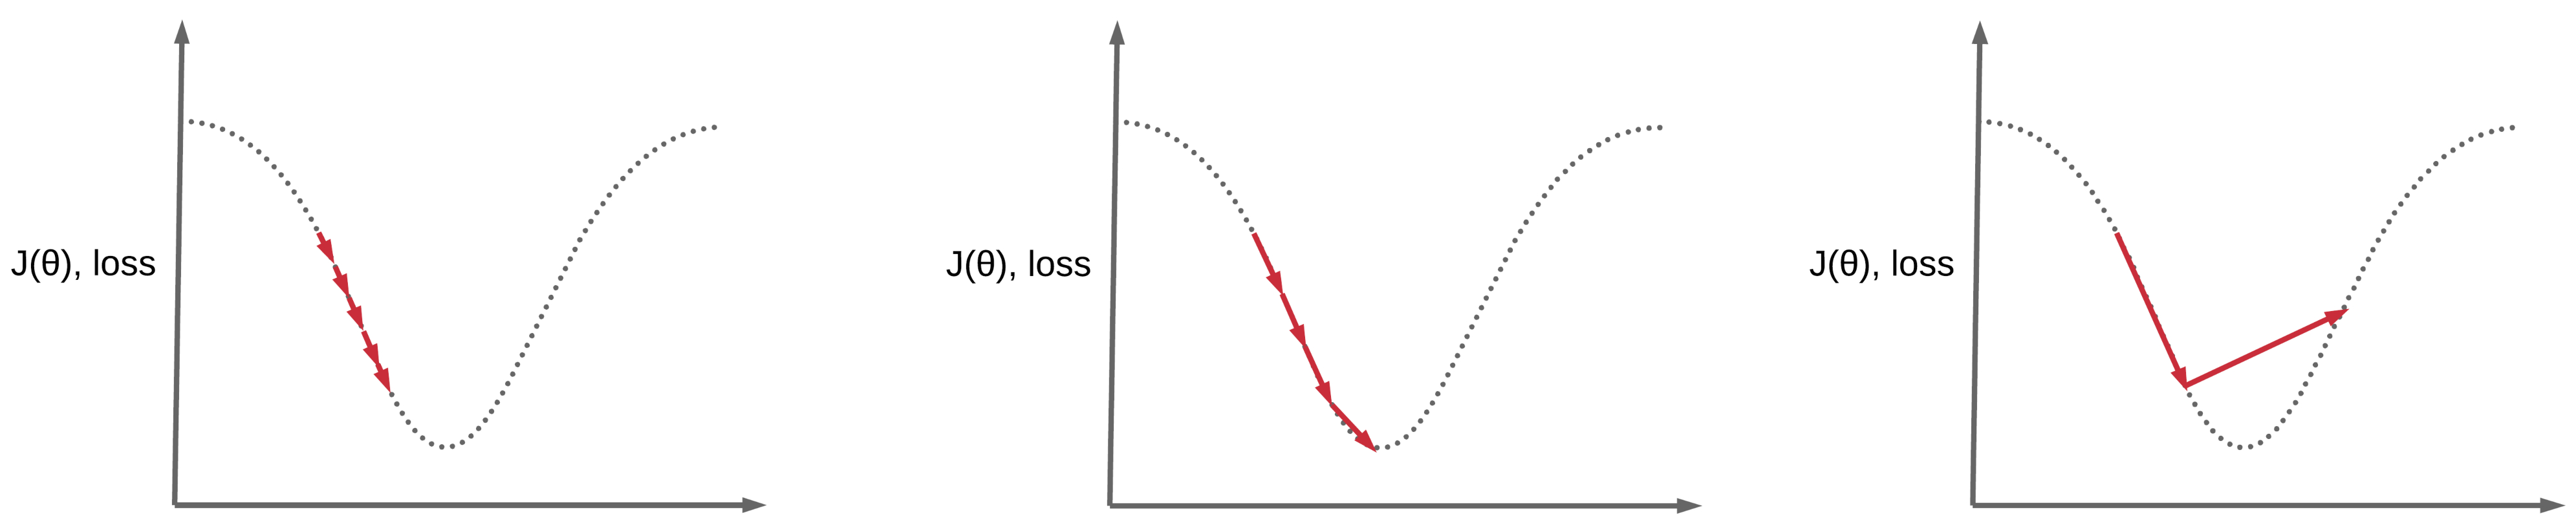

Slika 1 prikazuje što se događa kada je learning rate premal, 
Slika 2 prikazuje kada je dobro odabran, 
Slika 3 prikazuje kada je prevelik.


In [9]:
try:
    display(Image(filename = "images/learning_rate.jpg"))
except:
    display(Image(url = "https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png"))
    
print("Slika 1 prikazuje što se događa kada je learning rate premal, \nSlika 2 prikazuje kada je dobro odabran, \nSlika 3 prikazuje kada je prevelik.")

<p> Ako izaberemo premali $\eta$, tada će i promjena $\Delta v$ biti jako mala i gradijentni spust će raditi presporo. Ako izaberemo preveliki $\eta$ postoji opasnost da ćemo preskočiti minimum koji tražimo. Stoga, želimo pronaći $\eta$ takav da algoritam konvergira, ali da uz to nije spor. Na sljedećoj slici promotriti ćemo rad gradijentnog spusta na primjeru naše pojednostavljene cost funkcije. </p> 

In [10]:
def cost(x, y):
    """ Vrijedost cost funkcije x^2 + y^2 u točki (x, y) """
    return x**2 + y**2

def cost_gradient(x, y):
    """ Iznos gradijenta u točki (x, y) """
    return (2 * x, 2 * y)

def example_of_gradient_descent(x, y, eta):
    """ Gradijentni spust na primjeru pojednostavljene cost funkcije:
        Ulazne varijable:
        x, y - početne točke
        eta  - stopa učenja (learning rate) 
        Izlazne varijable:
        ball_x, ball_y, ball_z - (x, y, z) pozicija lopte """
    
    curr_x = x
    curr_y = y
    precision = 0.000001
    ball_x = []
    ball_y = []
    ball_z = []
    while 1:
        ball_x.append(curr_x)
        ball_y.append(curr_y)
        ball_z.append(cost(curr_x, curr_y))
        
        grad_x, grad_y = cost_gradient(curr_x, curr_y)
        new_x = curr_x - eta * grad_x
        new_y = curr_y - eta * grad_y
        if cost(new_x - curr_x, new_y - curr_y) < precision:
            break
            
        curr_x = new_x
        curr_y = new_y
            
    return ball_x, ball_y, ball_z

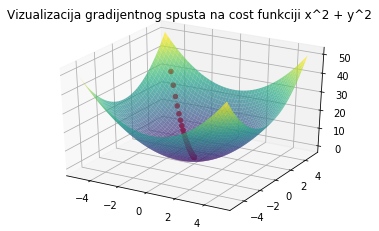

In [11]:
ax4 = plt.axes(projection='3d')

x = np.linspace(-5, 5, num = 50)
y = np.linspace(-5, 5, num = 50)
xx, yy = np.meshgrid(x, y)

ball_x, ball_y, ball_z = example_of_gradient_descent(-4, 4, 0.05)

ax4.scatter3D(ball_x, ball_y, ball_z, color='red', alpha = 1.0)
ax4.plot_surface(xx, yy, cost(xx, yy), rstride=1, cstride=1, cmap='viridis', alpha = 0.7)
ax4.set_title('Vizualizacija gradijentnog spusta na cost funkciji x^2 + y^2')

plt.show()

<p> Vratimo se u kontekst neuronskih mreža. Cilj gradijentnog spusta je pronaći što bolje $\omega_k$ i $b_l$ koji minimiziraju funkciju pogreške. Zapišimo jednadžbe promjene: 

$$ \omega_k \to \omega_k' = \omega_k - \eta \frac{\partial C}{\partial \omega_k}$$

$$ b_l \to b_l' = b_l - \eta \frac{\partial C}{\partial b_l} $$

Primjenjujući ovo pravilo nadamo se da ćemo se spustiti u minimum fukcije, odnosno da će naša neuronska mreža naučiti. </p>

<p>
Jedan od problema na koje naiđemo kada pokušamo primjeniti gradijentni spust je brzina izvršavanja. Vratimo se na jednadžbu pogreške. Jednadžba je oblika $C = \frac{1}{n}\sum_x C_x$. U praksi, kako bi izračunali gradijentni spust, prvo moramo izračunati gradijentne za svaki $\nabla C_x$ i onda uzeti njihovu aritmetičku sredinu. Ako je broj test primjera $x$ velik, to može biti vrlo sporo. Kao malu optimizaciju uvodimo pojam stohastičkog gradijentnog spusta. Stohastički gradijentni spust radi na principu nasumičnog izbora malog broja elemenata pomoču kojeg približno izračunamo $\nabla C$. Ovakvim pristupom, vrlo brzo možemo doći do brze procjene za $\nabla C$ i samim tim ubrzati algoritam. Odlučimo li se za korištenje stohastičkog gradijentnog spusta, konačne jednadžbe promjene su: 
    $$ \omega_k \to \omega_k' = \omega_k - \frac{\eta}{m} \sum_x \frac{\partial C_x}{\partial \omega_k} $$ <br>
    $$ b_l \to b_l' = b_l - \frac{\eta}{m} \sum_x \frac{\partial C_x}{\partial b_l} $$
</p>

<p>
Usprkos tome što pronalazi lokalni minimum, ideja gradijentnog spusta pokazala se iznimno učinkovitom u strojnom učenju, pa tako i u treniranju neuronskih mreža. Veliki problem gradijentnog spusta je njegova brzina izvršavanja, stoga je osmišljen algoritam zvan <em>Backpropagation</em> koji ćemo detaljnije proučiti u sljedećem poglavlju.
</p>

#### Backpropagation <a name="backpropagation"></a>

<p> U prošlom poglavlju vidjeli smo kako neuronske mreže mogu naučiti težine i bias pomoću gradijentnog spusta. Međutim, postoji nedostatak u objašnjenju, a to je kako izračunati gradijent funkcije pogreške. U ovom poglavlju naučiti ćemo kako brzo izračunati gradijent funkcije pomoću algoritma zvanog <em>backpropagation</em>.</p>

<p> Prvo ćemo se upoznati sa notacijom koju ćemo koristiti pri izvođenju jednadžbi. </p>

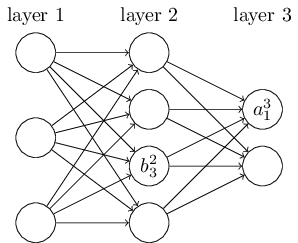

In [12]:
try:
    display(Image(filename = "images/oznake.png"))
except:
    display(Image(url = "http://neuralnetworksanddeeplearning.com/images/tikz17.png"))

<p> Koristiti ćemo $\omega_{ij}^l$ za označiti poveznicu između $i$-tog neurona u $(l-1)$. sloju i $j$-tog neurona u $l$-tom sloju. Bias u $j$-tom neuronu u $l$-tom sloju označiti ćemo sa $b_{j}^l$. Aktivacijsku vrijednost $j$-tog neurona u $l$-tom sloju ćemo označiti sa $a_{j}^l$. Primjetimo da vrijednost aktivacije u $l$-tom čvoru ovisi o aktivaciji u prethodnom čvoru, odnosno: 
   $$ a_{j}^{l} = \sigma\bigg(\sum_i a_{i}^{l-1}\omega_{ij}^{l} + b_{j}^{l}  \bigg) $$
<br>
Odnosno, zapišemo li gornju jednadžbu u matričnom obliku vrijedi: <br><br>
    $$ a_{l} = \sigma(((a^{l-1})^{T}\omega^{l})^{T} + b^{l}) $$
<br>
Kako bi kasnije pojednostavili račun, uvesti ćemo i varijablu $z^l = ((a^{l-1})^{T}\omega^{l})^{T} + b^{l}$. Konačno, uvodimo i notaciju $\odot$ za Hadamard produkt - množenje dva vektora element po element, npr. 
<br>
<br>
$$  \begin{bmatrix}
      1 \\
      2 \\
    \end{bmatrix}
    \odot
    \begin{bmatrix}
       3 \\
       4 \\
    \end{bmatrix}
    =
    \begin{bmatrix}
       1 \cdot 3  \\
       2 \cdot 4 \\
    \end{bmatrix} $$
</p>
    
<p> 

<p> Da bi mogli izračunati $\frac{\partial C}{\partial \omega_{ij}^l}$ i $\frac{\partial C}{\partial b_{j}^l}$ prvo moramo uvesti vrijednost $\delta_{j}^l$ koju zovemo pogreška na $j$-tom neuronu u $l$-tom sloju. Da bi bolje razumjeli kako je $\delta_{j}^l$ definiran, zamislimo da na $j$-tom neuronu u $l$-tom sloju nastane mala pogreška $\Delta z_{j}^l$. Stoga, umjesto da neuron šalje $\sigma(z_{j}^l)$, šalje $\sigma(z_{j}^{l} + \Delta z_{j}^l)$. Ova promjena šalje se iz sloja u sloj mreže, konačno rezultirajući u pogrešci $\frac{\partial C}{\partial z_{j}^l} \Delta z_{j}^l$. Pretpostavimo da $\frac{\partial C}{\partial z_{j}^l}$ ima veliku vrijednost. Tada bi odabirom dobrog $\Delta z_{j}^l$ mogli značajno smanjiti pogrešku. Suprotno tomu, ako je $\frac{\partial C}{\partial z_{j}^l}$ približno nula, onda malim promjenama na $z_{j}^l$ možemo jako slabo djelovati na pogrešku, odnosno, možemo zaključiti da je taj neuron dobro postavljen. Zaključujemo da je  $\frac{\partial C}{\partial z_{j}^l}$ zapravo dobra mjera pogreške na neuronu. Motivirani ovim primjerom, definiramo $\delta_{j}^l = \frac{\partial C}{\partial z_{j}^l}$. </p>

<p> Jedini razlog zbog kojeg definiramo $\delta_{j}^l$ na ovakav način, umjesto preko aktivacijske vrijednosti $a_{j}^l$ je jer gornji pristup čini račun malo jednostavnijim. </p>

<p> Slijede 4 jednadžbe na kojima se temelji algoritam backpropagacije.  </p>
<br>
Jednadžba 1 - pogreška na izlaznom sloju: $\delta_{j}^{L} = \frac{\partial C}{\partial a_{j}^L}\sigma ' (z_{j}^L)$, odnosno matrično $\delta^L = \nabla_{a}C \odot \sigma'(z^L) $

Jednadžba 2 - pogreška $\delta^l$ izražena preko pogreške sljedećeg sloja $\delta^{l+1}$: $\delta^l = (\omega^{l+1}\delta^{l+1}) \odot \sigma'(z^l)$

Jednadžba 3 - odnos pogreške $\delta_{j}^l$ i biasa $b_{j}^l$: $\frac{\partial C}{\partial b_{j}^l} = \delta_{j}^l$

Jednadžba 4 - odnos pogreške $\delta_{j}^l$ i težine $\omega_{ij}^l$: $\frac{\partial C}{\partial \omega_{ij}^l} = a_{j}^{l-1}\delta_{j}^l$


Jednadžbe 3 i 4 još ćemo ponuditi u matričnom zapisu:

$$\frac{\partial C}{\partial b} = \delta$$

$$\frac{\partial C}{\partial b} = a_{in} \delta_{out}^{T}$$

gdje je $a_{in}$ vrijednost neurona koja "ulazi" na težinu, a $\delta_{out}$ pogreška na neuronu na koji "pokazuje" težina. 

Sve jednadžbe lako su izvedive korištenjem "chain rule"-a, u nastavku ćemo dati izvod Jednadžbe 1, ostale se slično pokažu: <br><br>
$$ \delta_j^L = \frac{\partial C}{\partial z_{j}^L} $$

$$ \delta_j^L = \frac{\partial C}{\partial a_{j}^L}\frac{\partial a_{j}^L}{\partial z_{j}^L} $$

$$ \delta_j^L = \frac{\partial C}{\partial a_{j}^L}\sigma'(z_{j}^L) $$

Sada kada su nam poznate jednadžbe backpropagationa, preostaje zapisati algoritam:
1. Unesi $x$ - izračunaj $a^{1}$.
2. Feedforward - izračunaj $z^l = ((a^{l-1})^T w^l)^T + b^l$, $a^l = \sigma(z^l)$, l = 2,..., L

3. Izračunaj izlaznu pogrešku $\delta^L$ - $\delta^L = \nabla_a C \odot \sigma'(z^L)$

4. Backpropagate pogrešku - l = L-1, ..., 2 izračunaj $\delta^l = (\omega^{l+1}\delta^{l+1}) \odot \sigma'(z^l)$

5. Izračunaj gradijent - $\frac{\partial C}{\partial \omega_{ij}^l} = a_{j}^{l-1}\delta_{j}^l$ i $\frac{\partial C}{\partial b_{j}^l} = \delta_{j}^l$

### Implementacija jednostavne neuronske mreže <a name="implementation"></a>


U nastavku slijedi implementacija klase neuronske mreže. Kod je napisan po uzoru na onaj iz knjige "M. Nielsen - Neural Networks and Deep Learning".
Glavna razlika u notebooku/kodu je što u knjizi $\omega$ ne pretstavlja matricu težina već transponiranu matricu težina zbog toga što je zapis malo "čišći". Ovdje koristimo $\omega$ kao matricu težina jer je intuitivniji i standardniji zapis, iako će to uzrokovati pojavu transponiranih matrica u jednadžbama i kodu.

In [13]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
def sigmoid_prime(z):
        return (sigmoid(z) * (1 - sigmoid(z)))

class Network(object):
    """
    Klasa neuronska mreža:
        Konstruktor klase prima listu koja sadrži broj neurona po slojevima.
        Funkcije koje će koristiti korisnik su: train i classify
    
        Funkcija train služi za treniranje neuronske mreže.
        Funkcija classify vraća vektor u kojem su zapisana predviđanja 
        neuronske mreže za dani ulazni vektor podataka.
    
        train_data input: 784 x 1 vektor piksela 
        train_data output: 10 x 1 vektor (npr. 3 = (0,0,0,1,0,0,0,0,0,0))
    """

    def __init__(self, neurons_per_layer):
        """ Konstruktor klase. Primjer Network([10, 5, 3]) stvara neuronsku mrežu sa 3 sloja:
            Prvi sloj ima 10 neurona, drugi 5 neurona, treći 3 neurona. """
        self.number_of_layers = len(neurons_per_layer)
        self.neurons_per_layer = neurons_per_layer
        self.biases = [np.random.randn(y, 1) for y in neurons_per_layer[1:]]
        self.weights = [np.random.randn(x, y) for x, y in zip(neurons_per_layer[:-1], neurons_per_layer[1:])]
    
    def forward_propagation(self, input_data):
        """ Za dani ulazni vektor podataka izračunava izlazni vektor podataka. """
        propagate_data = input_data
        for w, b in zip(self.weights, self.biases):
            propagate_data = sigmoid(np.add(np.dot(propagate_data.T, w).T, b))
        output_data = propagate_data
        return output_data
    
    def stochastic_gradient_descent(self, train_data, learning_rate, mini_batch_size, epochs, test_data = None):
        """ Treniranje neuronske mreže koristeći stohastički gradijentni spust. 
            train_data je lista tupleova(ulaz, očekivani_izlaz). """
        if test_data is not None:
            test_data_size = len(test_data)
        else:
            test_data_size = 0
            
        train_data_size = len(train_data)
        for current_epoch in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k + mini_batch_size] for k in range(0, train_data_size, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_model(mini_batch, learning_rate)
            
            if test_data_size != 0:
                print("Epoch", current_epoch + 1, ": ",  self.evaluate(test_data), "/", test_data_size)
            else:
                print("Epoch", current_epoch + 1, ": Complete")
    
    def update_model(self, mini_batch, learning_rate):
        """ Promjena težina i biasa u neuronskoj mreži primjenom
            gradijentnog spusta (backpropagation) na mini_batchu. """
        mini_batch_size = len(mini_batch)
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        
        for x, y in mini_batch:
            delta_w, delta_b = self.backpropagation(x, y)
            nabla_w = [nw + dw for nw, dw in zip(nabla_w, delta_w)]
            nabla_b = [nb + db for nb, db in zip(nabla_b, delta_b)]
            
        self.weights = [np.subtract(w, np.multiply((learning_rate / mini_batch_size), nw)) for w, nw, in zip(self.weights, nabla_w)]
        self.biases = [np.subtract(b, np.multiply((learning_rate / mini_batch_size), nb)) for b, nb in zip(self.biases, nabla_b)]        
        
    def backpropagation(self, x, y):
        """ Backpropagation algoritam. Vraća tuple (nabla_w, nabla_b)
            gdje nabla_w i nabla_b reprezentiraju gradijent funkcije pogreške. """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activation_values = [x]
        z_values = []
        for b, w in zip(self.biases, self.weights):
            z = np.add(np.dot(activation.T, w).T, b)
            z_values.append(z)
            activation = sigmoid(z)
            activation_values.append(activation)
        
        delta = np.multiply(activation_values[-1] - y, sigmoid_prime(z_values[-1]))
        nabla_w[-1] = np.dot(activation_values[-2], delta.T)
        nabla_b[-1] = delta
        
        for l in range(2, self.number_of_layers):
            delta = np.multiply(np.dot(self.weights[-l + 1], delta), sigmoid_prime(z_values[-l]))
            nabla_w[-l] = np.dot(activation_values[-l - 1], delta.T)
            nabla_b[-l] = delta
            
        return (nabla_w, nabla_b)
    
    def evaluate(self, test_data):
        """ Vraća broj podataka koje neuronska mreža dobro klasificira. """
        results = [(np.argmax(self.forward_propagation(x)), np.argmax(y)) for x, y in test_data]
        return sum(int(x == y) for x, y in results)
    
    def train(self, train_data, learning_rate, mini_batch_size, epochs, validation_data = None):
        """ Služi za treniranje neuronske mreže. Prima train_data oblika lista tuple-a 
            (ulaz, očekivani_izlaz), stopu učenja learning_rate, veličinu batcha mini_batch_size,
            broj epoha (koliko puta neuronska mreža prođe kroz podatke) epochs i test_data. 
            Ako je dan validation_data ispisuje koliko je točno klasificiranih podataka od ukupnog broja. """
        self.stochastic_gradient_descent(train_data, learning_rate, mini_batch_size, epochs, validation_data)
    
    def classify(self, test_data):
        """ Služi za klasificiranje slika znamenki. 
            Prima test_data kao listu ulaznih vektora.
            Vraća listu znamenki gdje na i-toj poziciji stoji
            predviđanje koji je broj i-ti element test_data-e."""
        predictions = []
        for image in test_data:
            prediction = self.forward_propagation(image)
            predictions.append(np.argmax(prediction))
        return predictions

Funkcija load_data koja učitava i sređuje podatke sa Kaggle-a (https://www.kaggle.com/c/digit-recognizer/data) i output_data koja priprema podatke za submitanje na Kaggle.

In [14]:
def load_data():
    """ Prima podatke iz .csv fileova train.csv i test.csv skinutih sa Kaggle-a. (https://www.kaggle.com/c/digit-recognizer/data)
        Vraća 3 podatka:
            train_data = list[(network_input, network_output)], network_input 784 x 1 vektor, network_output 10 x 1 vektor
            validation_data = list[(network_input, network_output)], network_input 784 x 1 vektor, network_output 10 x 1 vektor
            test_data = list[network_input], network_input 784 x 1 vektor
    """
    data = pd.read_csv("train.csv")
    pandas_test_data = pd.read_csv("test.csv")
    pandas_train_data, pandas_validation_data = train_test_split(data, test_size = 0.05)
    
    numpy_train_data = pandas_train_data.to_numpy()
    numpy_validation_data = pandas_validation_data.to_numpy()
    numpy_test_data = pandas_test_data.to_numpy()
    
    train_data = []
    validation_data = []
    test_data = []
    for row in range(np.size(numpy_train_data, 0)):
        y = np.zeros([10, 1])
        y[numpy_train_data[row][0]] = 1
        x = numpy_train_data[row][1:] / 255.0
        x = np.reshape(x, (784, 1))
        train_data.append((x, y))
    
    for row in range(np.size(numpy_validation_data, 0)):
        y = np.zeros([10, 1])
        y[numpy_validation_data[row][0]] = 1
        x = numpy_validation_data[row][1:] / 255.0
        x = np.reshape(x, (784, 1))
        validation_data.append((x, y))
        
    for row in range (np.size(numpy_test_data, 0)):
        x = numpy_test_data[row] / 255.0
        x = np.reshape(x, (784, 1))
        test_data.append(x)
        
    return (train_data, validation_data, test_data)

def output_data(predictions):
    """ Funkcija output_data priprema podatke za submitanje na kaggle, 
        potrebno joj je poslati predviđanja neuronske mreže. Stvara datoteku submit.csv
        koju trebamo predati na Kaggle. """
    test_data = pd.read_csv("test.csv")
    test_data = test_data.transpose()
    output = pd.DataFrame({'ImageId' : test_data.columns + 1, 'Label' : predictions})
    output.to_csv('submit.csv', index = False)

Primjena klase na Kaggleove podatke. Želite li reproducirati rezultate dobivene u notebooku, morate skinuti podatke (train.csv, test.csv) sa Kaggle-ove stranice.

In [15]:
train_data, validation_data, test_data = load_data()

Konstrukcija objekta neuronska mreža.

In [16]:
net = Network([784, 30, 30, 10])

Treniranje objekta na podacima train_data.

In [ ]:
# Neuronsku mrežu trenirati sa sljedećim parametrima:
# learning_rate = 1.5, mini_batch_size = 10, epochs = 20

net.train(train_data, 1.5, 10, 20, validation_data)

Epoch 1 :  1857 / 2100
Epoch 2 :  1915 / 2100
Epoch 3 :  1940 / 2100
Epoch 4 :  1946 / 2100
Epoch 5 :  1944 / 2100
Epoch 6 :  1953 / 2100
Epoch 7 :  1969 / 2100
Epoch 8 :  1963 / 2100
Epoch 9 :  1966 / 2100
Epoch 10 :  1969 / 2100
Epoch 11 :  1973 / 2100
Epoch 12 :  1983 / 2100
Epoch 13 :  1994 / 2100
Epoch 14 :  1978 / 2100
Epoch 15 :  1982 / 2100
Epoch 16 :  1985 / 2100
Epoch 17 :  1987 / 2100
Epoch 18 :  1987 / 2100
Epoch 19 :  1979 / 2100


Računanje predikcija iz test_data te spremanje podataka u .csv file spreman za predaju na Kaggle.

In [ ]:
predictions = net.classify(test_data)
output_data(predictions)

Koristeći klasu Network koju smo ranije implementirali postigli smo preciznost od 94.171% na Kaggle-u.

### Zaključak <a name="conclusion"></a>


<p> U ovom notebooku pokušali smo razviti neku intuiciju oko toga kako neuronske mreže rade te smo implementirali vlastitu neuronsku mrežu od nule kako bi bolje shvatili sve rezultate. Iako smo postigli neloš rezultat od 94.171%, moguće je postići i mnogo bolji rezultat (suvremene neuronske mreže postižu preciznost od 99.79% na MNIST datasetu). </p>

<p> Želimo li postići bolje rezultate ili nas je samo zaintrigirala ova tema, za buduće istraživanje trebali bi se uputiti u pojam <b>konvolucijske</b> neuronske mreže koje što dublje ulazimo u mrežu uče prepoznavati kompleksnije oblike i značajke.  </p> 

<p> Zbog toga što su modelirane prema ljudskom mozgu i postižu iznimne rezultate ljudi vjeruju da su upravo neuronske mreže put ka umjetnoj inteligenciji. U ranim danima istraživanja umjetne inteligencije postojala je nada da ćemo izgrađujući umjetnu inteligenciju usput shvatiti principe iza same inteligencije i rada ljudskog mozga. Međutim iz dosadašnjeg iskustva rada sa neuronskim mrežama koje poprilično funkcioniraju kao black-box, teško da ćemo ikada zaključiti na kom principu radi ljudski mozak. </p>


##### Mate Peroš, Matematički softver, 2020.